# 시각화 (Visualization)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings(action='ignore')
#  warnings.filterwarnings(action='default')

In [4]:
data = pd.read_csv("Busan_Covid-19.csv")

data

,date,day,total_coronic,new_coronic,total_be_cured,new_be_cured,deceased,new_deceased,total_negative,new_negative,diagnosed,isolated,total_released,new_released
0,2021-02-18,목,3108,17,2674,20,102,1,331206,1648,1665,5611,101305,370
1,2021-02-17,수,3091,26,2654,24,101,0,329558,1660,1686,5484,100935,382
2,2021-02-16,화,3065,17,2630,18,101,0,327898,1389,1406,5476,100553,274
3,2021-02-15,월,3048,19,2612,22,101,0,326509,1286,1305,5470,100279,302
4,2021-02-14,일,3029,15,2590,11,101,1,325223,1387,1402,5456,99977,464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2020-02-25,화,51,13,0,0,0,0,1823,324,337,618,22,0
360,2020-02-24,월,38,22,0,0,0,0,1499,407,429,263,22,7
361,2020-02-23,일,16,11,0,0,0,0,1092,0,11,145,15,0
362,2020-02-22,토,5,3,0,0,0,0,1092,479,482,115,15,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            364 non-null    object
 1   day             364 non-null    object
 2   total_coronic   364 non-null    int64 
 3   new_coronic     364 non-null    int64 
 4   total_be_cured  364 non-null    int64 
 5   new_be_cured    364 non-null    int64 
 6   deceased        364 non-null    int64 
 7   new_deceased    364 non-null    int64 
 8   total_negative  364 non-null    int64 
 9   new_negative    364 non-null    int64 
 10  diagnosed       364 non-null    int64 
 11  isolated        364 non-null    int64 
 12  total_released  364 non-null    int64 
 13  new_released    364 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 39.9+ KB


In [6]:
data.shape

(364, 14)

In [7]:
data.columns

Index(['date', 'day', 'total_coronic', 'new_coronic', 'total_be_cured',
       'new_be_cured', 'deceased', 'new_deceased', 'total_negative',
       'new_negative', 'diagnosed', 'isolated', 'total_released',
       'new_released'],
      dtype='object')

In [8]:
sns.set(style = 'whitegrid', context = 'notebook')
col = ['total_coronic', 'new_coronic', 'total_be_cured',
       'new_be_cured', 'deceased', 'new_deceased', 'total_negative', 'new_negative',
       'diagnosed', 'isolated', 'total_released', 'new_released']

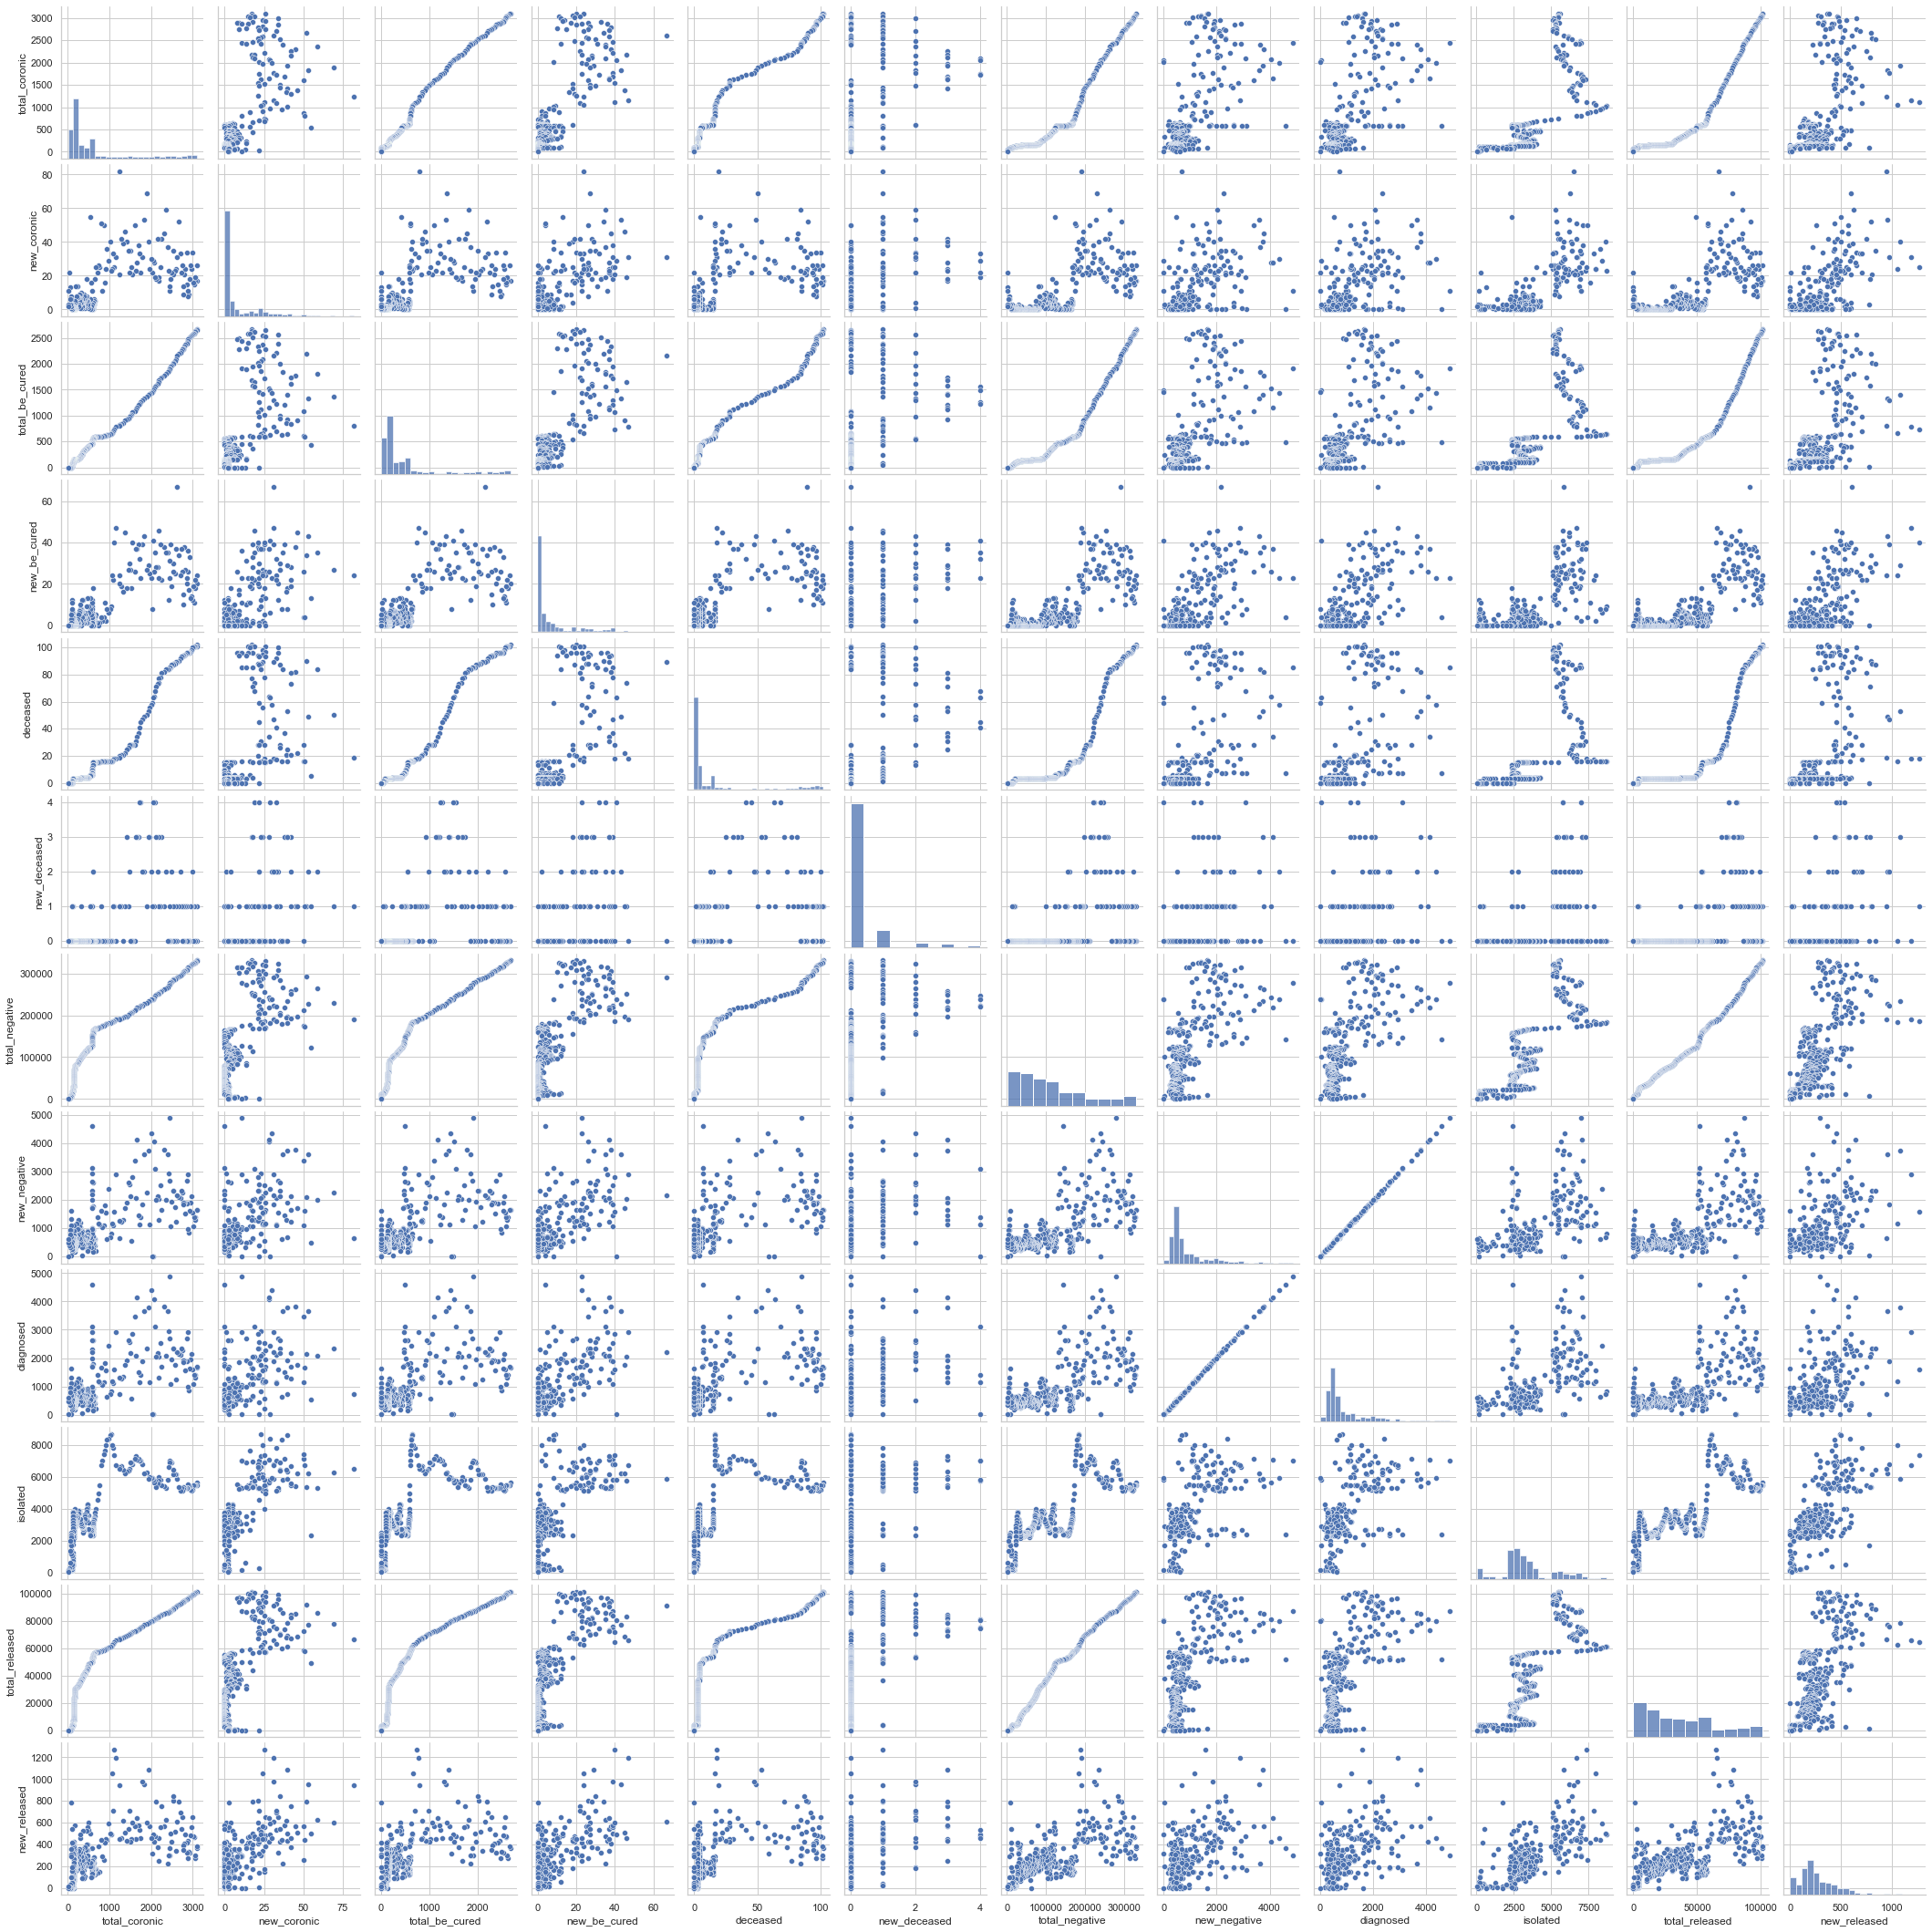

In [9]:
sns.pairplot(data[col], size = 2.5)
plt.show()
sns.reset_orig()

In [10]:
corr = data[col].corr()

In [11]:
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

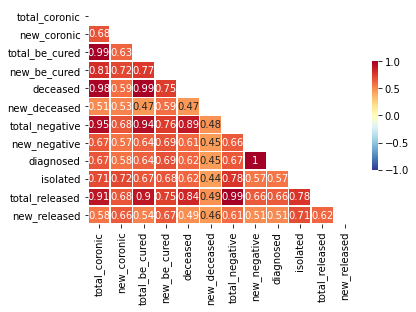

In [12]:
# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,            
            mask=mask,               
            linewidths=.5,           
            cbar_kws={"shrink": .5}, 
            vmin = -1,vmax = 1       
           )  
plt.show()

* 'new_deceased'변수는 일반적으로 상관관계가 0.5를 넘지 않아 약한 양의 상관관계를 가진다고 할 수 있다.
* 그 외 0.5부터 0.8까지의 상관관계를 가진 변수들은 양의 상관관계를 가짐을 알 수 있다.
* 0.8를 넘는 변수들은 강한 상관관계를 가진다고 할 수 있다.

### 시간에 따른 확진자 수 파악

In [13]:
y_pos = np.arange(len(data['date']))
y_pos = np.flip(y_pos)

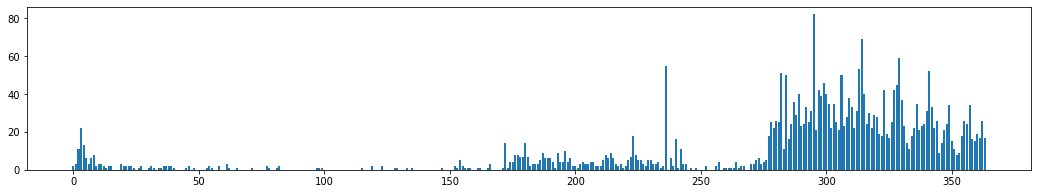

In [14]:
plt.figure(figsize=(18,3))
plt.bar(y_pos, data['new_coronic'])
plt.show()

In [15]:
data.iloc[350-270,0]

'2020-11-30'

In [16]:
data.loc[data['new_coronic'].idxmax()]

date              2020-12-12
day                        토
total_coronic           1227
new_coronic               82
total_be_cured           802
new_be_cured              24
deceased                  19
new_deceased               1
total_negative        190429
new_negative             662
diagnosed                744
isolated                6485
total_released         66556
new_released             947
Name: 68, dtype: object

약 2020년 11월 부터 코로나 확진자 판정을 받은 사람의 수가 대폭 증가함을 알 수 있다.  
또한 2020년 12월 12일에 총 82명의 인원이 추가 확진자로 판정받아 가장 높은 값을 가짐을 그래프상에서 알 수 있다.

In [17]:
# %matplotlib auto

plt.figure(figsize=(18,3))
plt.bar(y_pos, data['new_coronic'])
plt.xticks(y_pos, data['date'], rotation=90, size = 6)
plt.show()

### 시간에 따른 완치자 수 파악

In [18]:
y_pos = np.arange(len(data['date']))
y_pos = np.flip(y_pos)

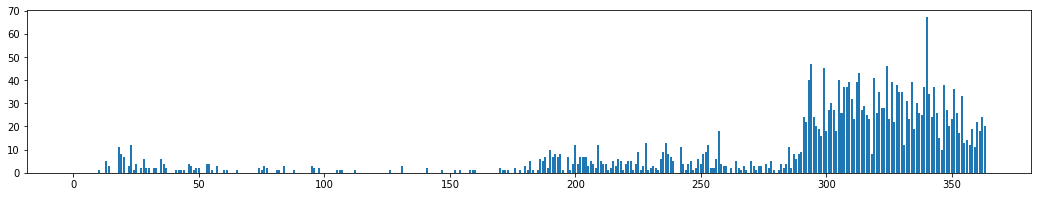

In [19]:
plt.figure(figsize=(18,3))
plt.bar(y_pos, data['new_be_cured'])
plt.show()

In [20]:
data.iloc[350-290,0]

'2020-12-20'

In [21]:
data.loc[data['new_be_cured'].idxmax()]

date              2021-01-26
day                        화
total_coronic           2618
new_coronic               31
total_be_cured          2155
new_be_cured              67
deceased                  89
new_deceased               0
total_negative        290399
new_negative            2163
diagnosed               2194
isolated                5840
total_released         90927
new_released             606
Name: 23, dtype: object

약 2020년 12월 부터 코로나 완치 판정을 받은 사람의 수가 대폭 증가함을 알 수 있다.
또한 2021년 01월 26일에 총 67명의 인원이 코로나 완치를 판정받아 가장 높은 값을 가짐을 그래프상에서 알 수 있다.

In [22]:
import datetime

In [23]:
data.date = pd.to_datetime(data.date)

In [24]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [25]:
data.shape

(364, 16)

In [26]:
mydata0 = data.iloc[:,0]

In [27]:
mydata1 = data.iloc[:, 1:14]

In [28]:
mydata2 = data.iloc[:,14:16]

In [29]:
mydata2['month'] = mydata2['month'].apply(lambda x: "{:0>2d}".format(x))

In [30]:
mydata2 = mydata2.astype(str)

In [31]:
mydata2['year_month'] = mydata2[['year','month']].apply(lambda x: '-'.join(x), axis=1)

In [32]:
mydata2

,year,month,year_month
0,2021,02,2021-02
1,2021,02,2021-02
2,2021,02,2021-02
3,2021,02,2021-02
4,2021,02,2021-02
...,...,...,...
359,2020,02,2020-02
360,2020,02,2020-02
361,2020,02,2020-02
362,2020,02,2020-02


In [33]:
mydata2.groupby('year_month').count()

,year,month
year_month,,
2020-02,9,9
2020-03,31,31
2020-04,30,30
2020-05,31,31
2020-06,30,30
2020-07,31,31
2020-08,31,31
2020-09,30,30
2020-10,31,31


In [34]:
data = pd.concat([mydata0, mydata2, mydata1], axis=1)

In [35]:
data.dtypes

date              datetime64[ns]
year                      object
month                     object
year_month                object
day                       object
total_coronic              int64
new_coronic                int64
total_be_cured             int64
new_be_cured               int64
deceased                   int64
new_deceased               int64
total_negative             int64
new_negative               int64
diagnosed                  int64
isolated                   int64
total_released             int64
new_released               int64
dtype: object

In [36]:
data.shape

(364, 17)

In [37]:
mean_data = data.groupby('year_month').mean()

In [38]:
mean_data.index

Index(['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02'],
      dtype='object', name='year_month')

In [39]:
y_pos = np.arange(len(mean_data.index))

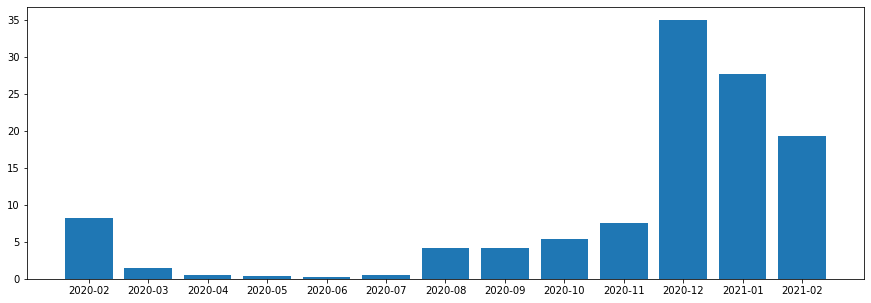

In [40]:
plt.figure(figsize=(15,5))
plt.bar(y_pos, mean_data['new_coronic'])
plt.xticks(y_pos, mean_data.index)
plt.show()

In [41]:
barWidth = 0.25

bar1 = mean_data['new_coronic']
bar2 = mean_data['new_be_cured']

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

print(r1)
print(r2)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25, 10.25, 11.25, 12.25]


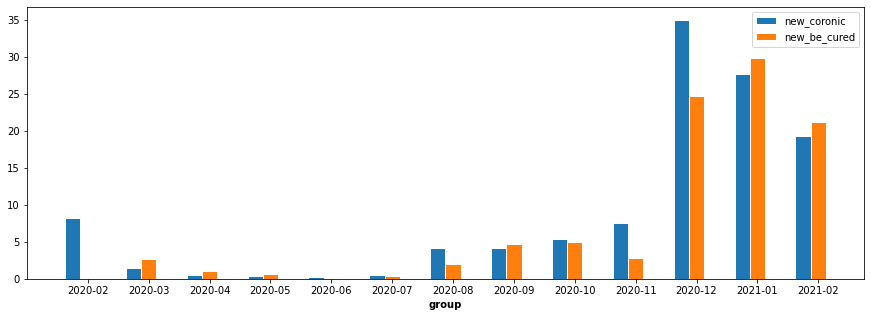

In [42]:
plt.figure(figsize=(15,5))

plt.bar(r1, bar1, width=barWidth, edgecolor='white', label='new_coronic')
plt.bar(r2, bar2, width=barWidth, edgecolor='white', label='new_be_cured')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], mean_data.index)

plt.legend()
plt.show()

* 평균적으로 2020년에는 완치자의 수보다 확진자의 수가 더 많음을 알 수 있다.  
* 2021년부터는 1월과 2월 모두 완치자의 수가 확진자의 수보다 더 많음을 알 수 있다.

In [43]:
sum_data = data.groupby('year_month').sum()

In [44]:
sum_data

,total_coronic,new_coronic,total_be_cured,new_be_cured,deceased,new_deceased,total_negative,new_negative,diagnosed,isolated,total_released,new_released
year_month,,,,,,,,,,,,
2020-02,369,74,0,0,0,0,23078,5956,6030,9048,763,440
2020-03,3052,44,1349,83,28,3,447047,14298,14342,19200,93591,3356
2020-04,3793,16,3079,31,90,0,804663,12723,12739,88325,174497,5495
2020-05,4322,10,3874,21,93,0,1198830,12570,12580,72679,376266,5287
2020-06,4381,7,4149,5,90,0,1652568,16800,16807,75464,524281,5607
2020-07,4851,17,4517,11,93,0,2156211,13325,13342,101751,732331,7051
2020-08,6838,128,5130,64,93,0,2639438,21825,21953,104500,979391,8758
2020-09,10900,126,8746,141,119,1,3190065,16428,16554,91632,1190647,7103
2020-10,16386,165,13331,155,171,5,3930337,37149,37314,95074,1504126,9190


In [45]:
barWidth = 0.25

bar1 = sum_data['new_coronic']
bar2 = sum_data['new_deceased']

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

print(r1)
print(r2)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25, 10.25, 11.25, 12.25]


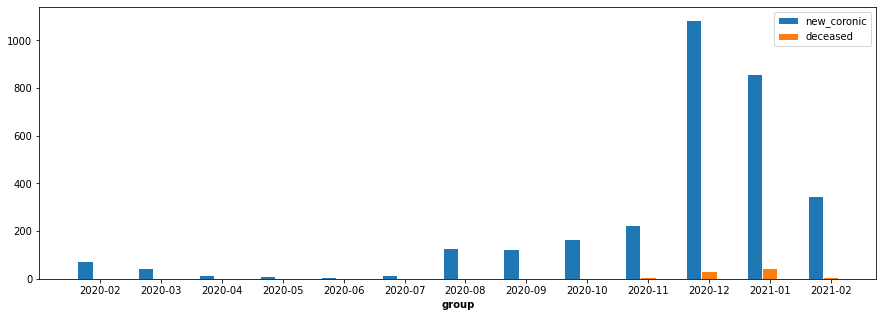

In [46]:
plt.figure(figsize=(15,5))

plt.bar(r1, bar1, width=barWidth, edgecolor='white', label='new_coronic')
plt.bar(r2, bar2, width=barWidth, edgecolor='white', label='deceased')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], mean_data.index)

plt.legend()
plt.show()

* 2020년 7월까지 확진자의 수는 약 100명보다 낮은 수치를 기록함을 알 수 있습니다.
* 8월부터 점점 확진자의 수는 증가하며 12월에 가장 높은 수치를 기록하고 점점 감소하고 있음을 알 수 있다.
* 사망자의 수는 매우 낮은 수를 기록하다가 2020년 12월부터 확진자 수가 매우 높아지면서 사망자의 수도 증가함을 알 수 있습니다.

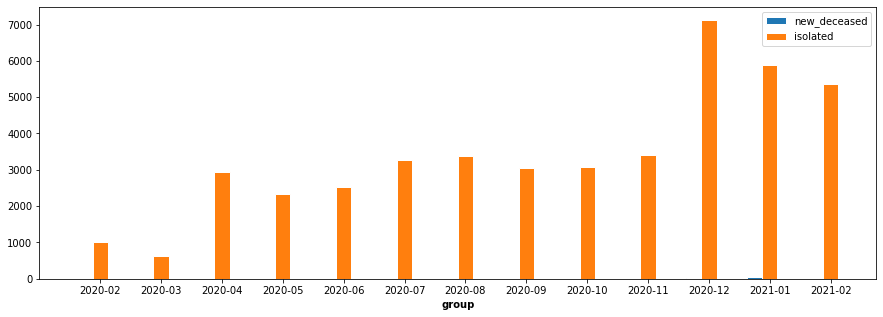

In [50]:
barWidth = 0.25

bar1 = sum_data['new_deceased']
bar2 = mean_data['isolated']

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(15,5))

plt.bar(r1, bar1, width=barWidth, edgecolor='white', label='new_deceased')
plt.bar(r2, bar2, width=barWidth, edgecolor='white', label='isolated')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], mean_data.index)

plt.legend()
plt.show()

* 격리된 인원에 비해 사망자의 수가 매우 적기 때문에 비교하기에 어려움이 존재한다.

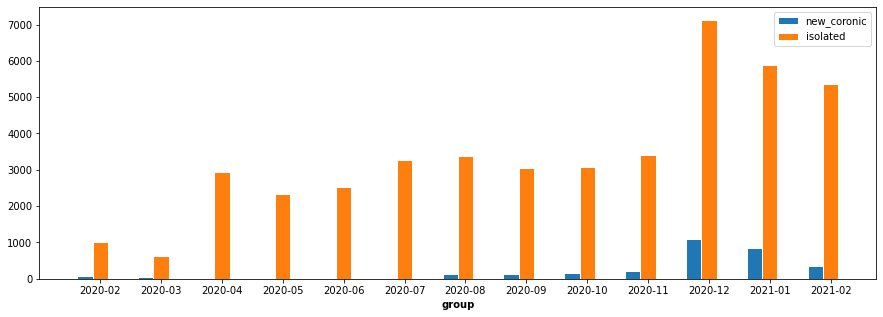

In [53]:
barWidth = 0.25

bar1 = sum_data['new_coronic']
bar2 = mean_data['isolated']

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(15,5))

plt.bar(r1, bar1, width=barWidth, edgecolor='white', label='new_coronic')
plt.bar(r2, bar2, width=barWidth, edgecolor='white', label='isolated')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], mean_data.index)

plt.legend()
plt.show()

* 2020년 8월부터 격리된 인원에 비례해서 확진자의 수도 변함을 알 수 있다.
* 확진자 및 격리자 인원수는 2020년 4월에 급상승해서 2020년 11월까지 비슷한 수로 유지되다가 2020년 12월에 확 증가해서 점점 감소함을 알 수 있다.

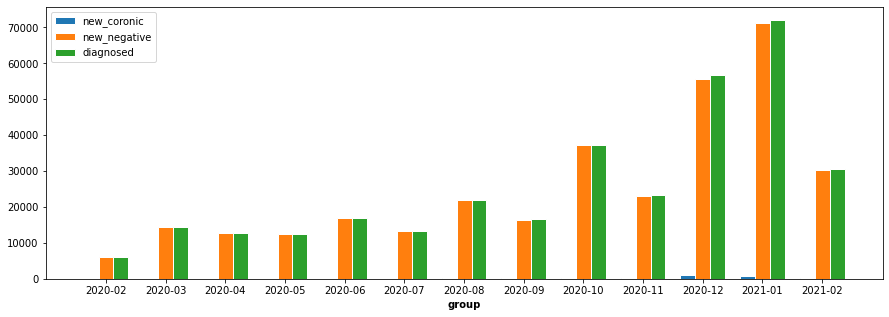

In [56]:
barWidth = 0.25

bar1 = sum_data['new_coronic']
bar2 = sum_data['new_negative']
bar3 = sum_data['diagnosed']

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(15,5))

plt.bar(r1, bar1, width=barWidth, edgecolor='white', label='new_coronic')
plt.bar(r2, bar2, width=barWidth, edgecolor='white', label='new_negative')
plt.bar(r3, bar3, width=barWidth, edgecolor='white', label='diagnosed')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], mean_data.index)

plt.legend()
plt.show()